In [150]:
from pathlib import Path

import torch
import torch.nn as nn

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [151]:
n_samples = 1000
noise = .05
factor = .6
random_state = 82

X, y = make_circles(n_samples = n_samples,
             noise = noise,
             random_state=random_state,
             factor=factor)

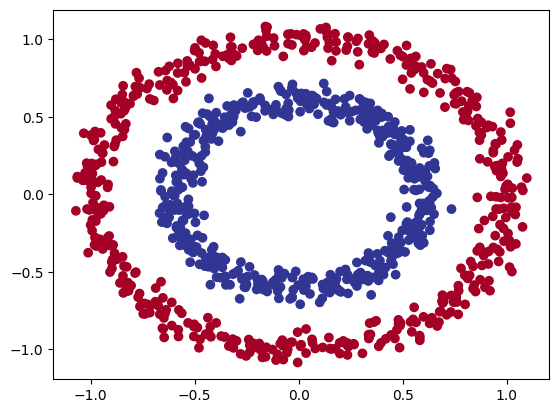

In [152]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [153]:
X.shape, y.shape

((1000, 2), (1000,))

In [154]:
X_sample, y_sample = X[0], y[0]

print(f"Example for a point sample {X_sample}, with label {y_sample}")
print(f"Data has {X.shape[0]} samples, with {X.shape[1]} features")

Example for a point sample [ 0.58185806 -0.29329201], with label 1
Data has 1000 samples, with 2 features


In [155]:
X_tensor = torch.from_numpy(X).type(dtype=torch.float)
y_tensor = torch.from_numpy(y).type(dtype=torch.float)

test_size = .2
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor,
                                                    test_size=test_size,
                                                    random_state=random_state)

In [156]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [157]:
class ClassifierModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2,
                                 out_features = 5)
        self.layer_2 = nn.Linear(in_features = 5,
                                 out_features = 1)
        
    def forward(self, X):
        return self.layer_2(self.layer_1(X))

In [158]:
model_0 = ClassifierModelV0().to(device)
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5702, -0.1735],
                      [ 0.4951,  0.1232],
                      [-0.3241, -0.1143],
                      [-0.3986, -0.0934],
                      [ 0.2445,  0.6334]])),
             ('layer_1.bias',
              tensor([-0.0165,  0.6925,  0.2222,  0.0701,  0.4854])),
             ('layer_2.weight',
              tensor([[-0.3437, -0.2552, -0.2147,  0.0808,  0.4318]])),
             ('layer_2.bias', tensor([-0.3147]))])

In [159]:
def accuracy_fn(y_pred, y):
    return (y_pred == y).sum(dim = 0).item() / y_pred.shape[0]

In [160]:
learning_rate = .01

loss_fn_0 = nn.BCEWithLogitsLoss()

optimizer_0 = torch.optim.SGD(params=model_0.parameters(), lr=learning_rate)

In [161]:
def predict_prob(y_pred):
    return torch.round(torch.sigmoid(y_pred))

In [162]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device).unsqueeze(dim=1)
y_test = y_test.to(device).unsqueeze(dim=1)

In [173]:
epochs = 500

training_loss = []
testing_loss = []
accuracy_training = []

for epoch in range(epochs):
    ## Training 
    # 1. Training mode
    model_0.train()
    
    # 2. Forward
    y_pred = model_0(X_train)
    
    # 3. Calc loss 
    loss = loss_fn_0(y_pred, y_train)
    
    # 4. Zero grad()
    optimizer_0.zero_grad()
    
    # 5. Backpropagation
    loss.backward()
    
    # 6. Update param
    optimizer_0.step()
    
    ## Evaluation
    model_0.eval()
    with torch.inference_mode():
        y_pred_prob = predict_prob(y_pred)  # Predict prob training
        acc = accuracy_fn(y_pred_prob, y_train) # Accuracy training
        
        y_pred_test = model_0(X_test) # Forward test
        test_loss = loss_fn_0(y_pred_test, y_test) # Calc loss test
        
    training_loss.append(loss)
    testing_loss.append(test_loss)
    accuracy_training.append(acc)
    
    if epoch % 20 == 0:
        print(f"Loss {loss:.2f} | Accuracy {acc:.2f} | Loss test {test_loss:.2f}")
#         print(f"{loss} {acc} {test_loss}")

Loss 0.69 | Accuracy 0.53 | Loss test 0.70
Loss 0.69 | Accuracy 0.53 | Loss test 0.70
Loss 0.69 | Accuracy 0.53 | Loss test 0.70
Loss 0.69 | Accuracy 0.53 | Loss test 0.70
Loss 0.69 | Accuracy 0.53 | Loss test 0.70
Loss 0.69 | Accuracy 0.53 | Loss test 0.70
Loss 0.69 | Accuracy 0.53 | Loss test 0.70
Loss 0.69 | Accuracy 0.53 | Loss test 0.70
Loss 0.69 | Accuracy 0.53 | Loss test 0.70
Loss 0.69 | Accuracy 0.53 | Loss test 0.70
Loss 0.69 | Accuracy 0.53 | Loss test 0.70
Loss 0.69 | Accuracy 0.53 | Loss test 0.70
Loss 0.69 | Accuracy 0.54 | Loss test 0.70
Loss 0.69 | Accuracy 0.54 | Loss test 0.70
Loss 0.69 | Accuracy 0.54 | Loss test 0.70
Loss 0.69 | Accuracy 0.54 | Loss test 0.70
Loss 0.69 | Accuracy 0.54 | Loss test 0.70
Loss 0.69 | Accuracy 0.53 | Loss test 0.70
Loss 0.69 | Accuracy 0.53 | Loss test 0.70
Loss 0.69 | Accuracy 0.53 | Loss test 0.70
Loss 0.69 | Accuracy 0.53 | Loss test 0.70
Loss 0.69 | Accuracy 0.53 | Loss test 0.70
Loss 0.69 | Accuracy 0.53 | Loss test 0.70
Loss 0.69 |

In [174]:
y_train.unsqueeze(dim=1).unsqueeze(dim=1).shape

torch.Size([800, 1, 1, 1])

In [165]:
y_test

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
      

In [166]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py is existing...")
else:
    print("Downloading helper_functions.py...")
    response = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(response.content)
    print("Download finish.")

helper_functions.py is existing...


In [167]:
import matplotlib.pyplot as plt
import numpy as np
from helper_functions import plot_predictions, plot_decision_boundary

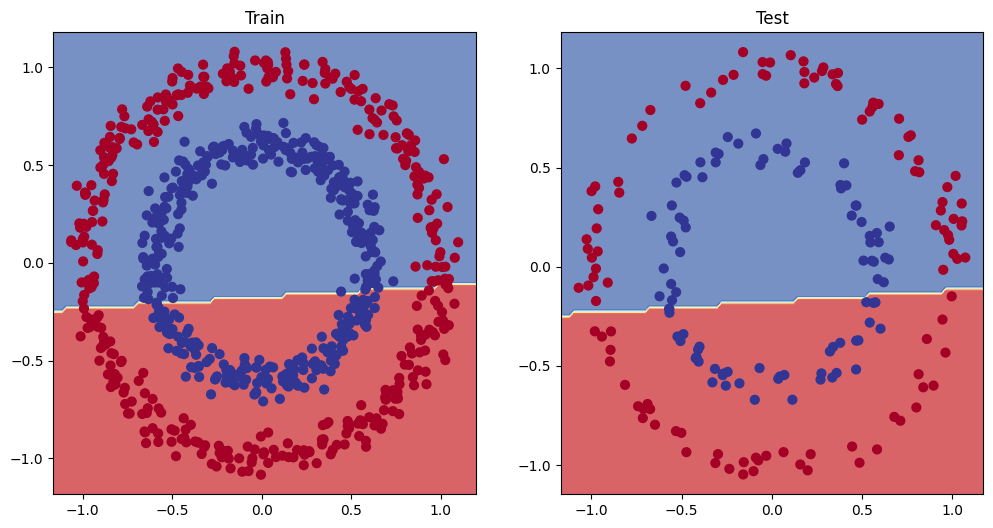

In [175]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

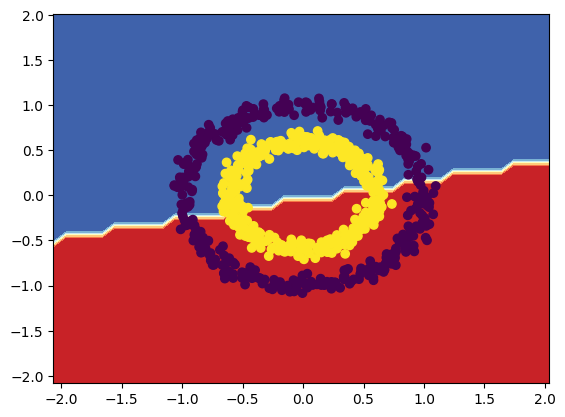

In [171]:
def sdef_plot_decision_boundary(model, X, y):
    
#     def _normalize(X):
#         X_copy = X.clone()
#         X_copy = torch.sigmoid(X_copy)
#         X_copy = torch.where(X > 0.6, 1, X)
#         X_copy = torch.where(X < 0.4, 0, X)
#         return X_copy
    
    X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(X_min, X_max, .1), np.arange(y_min, y_max, .1))
    input_x = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).type(dtype=torch.float32)
    
    with torch.inference_mode():
        y_pred = model(input_x)
        y_pred = torch.round(torch.sigmoid(y_pred))
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    
    
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()
    
    

sdef_plot_decision_boundary(model_0, X_train, y_train)

In [170]:
xx, yy = np.meshgrid(np.arange(0, 1, .2), np.arange(0, 1, .2))
torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).shape

torch.Size([25, 2])

In [ ]:
class ClassifierModelV1(nn.Module):
    def __init__(self):
        super().__init__()